In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pl
import seaborn as sb
from plot_functions import *
from matplotlib.ticker import *


C1='#D81B60'
C2='#1E88E5'
C3='#FFC107'
C4='#135247'
colors=[C1,C2,C3,C4]

In [2]:
def mutoi(mu):
    i=  np.arccos(mu)/2/np.pi*360
    return i

def itomu(i):
    mu=np.cos(i/320*2*np.pi)

In [3]:
datafile="simulated_spectra_2/ref_control/fits_relxill_control_3to10.dat"
data=pd.read_csv(datafile)

# data['a']=data['a'].astype('float')
data["i"]=mutoi(data["mu"])
# print(data["fit_a"])
data["delta_a"]=data["fit_a"]-data["a"]
data["delta_i"]=data["fit_i"]-data["i"]
data["delta_frac"]=data["fit_frac"]-data["frac"]
data["delta_A"]=data["fit_Afe"]-data["Afe"]
data['redchi']=data['chi2']/data['dof']

# data_subset=data[data["i"]<30]

# print(data['fit_h'])
print(data.shape[0])

clean_data=data[data['redchi']<1.5]
print(clean_data.shape[0])

1000
989


In [4]:
# print(data["chi2"]/data["dof"])

0.7853343065455307


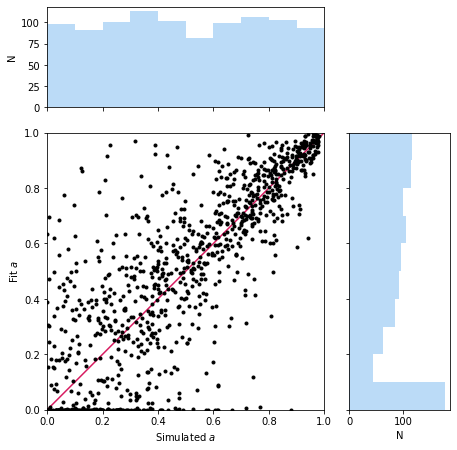

In [10]:
spin_plot(clean_data)
print(clean_data.corr()['a']['fit_a'])
pl.savefig('figures/param_recovery/refcontrol_ref_a.pdf',bbox_inches='tight')

0.9804062921009796


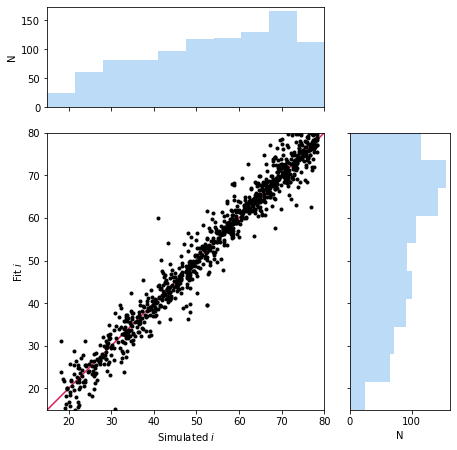

In [11]:
inc_plot(clean_data)
print(clean_data.corr()['i']['fit_i'])
pl.savefig('figures/param_recovery/refcontrol_ref_i.pdf',bbox_inches='tight')

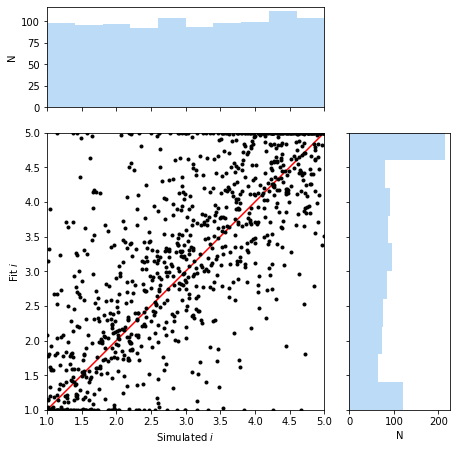

In [7]:
Afe_plot(clean_data)
clean_data.corr()['Afe']['fit_Afe']
pl.savefig('figures/param_recovery/refcontrol_ref_Afe.pdf',bbox_inches='tight')

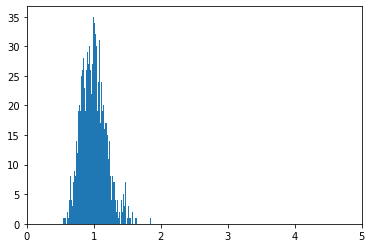

In [8]:
fig=pl.figure(facecolor='w')
ax=pl.subplot(111)
ax.set_xlim(0,5)

hist=pl.hist(data['redchi'],bins=100)